In [1]:
import pandas as pd

In [5]:
pwd

'C:\\Users\\User\\Downloads\\Gradient Descent Updated'

In [7]:
housing=pd.read_csv("Housing (1).csv")

In [8]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [11]:
a=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea"]
housing[a]=housing[a].apply(lambda x: x.map({"yes":1, "no": 0}))

In [12]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [15]:
status= pd.get_dummies(housing["furnishingstatus"], drop_first=True)
housing= pd.concat([housing,status], axis=1)
housing.drop(["furnishingstatus"], axis=1, inplace=True)

In [30]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [31]:
housing = (housing - housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [32]:
X = housing['area']
y = housing['price']

In [33]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='area', ylabel='price'>

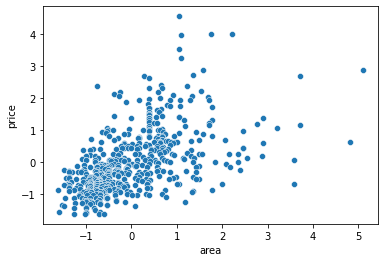

In [37]:
sns.scatterplot(data=housing, x='area', y='price')

In [38]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [39]:
def gradient( X , y , m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N=float(len(y))
    gd_df=pd.DataFrame( columns=["m_current","c_current","cost"])
    for i in range(iters):
        y_current=(m_current*X)+c_current
        cost=sum([data**2 for data in (y-y_current)])/N
        m_gradient= -(2/N)* sum(X*(y-y_current))
        c_gradient= -(2/N)* sum(y-y_current)
        m_current= m_current-(learning_rate*m_gradient)
        c_current=c_current-(learning_rate*c_current)
        gd_df.loc[i]=[m_current,c_current,cost]
    return(gd_df)

In [41]:
gradients = gradient(X,y)
gradients.tail()

,m_current,c_current,cost
995,0.535997,0.0,0.711399
996,0.535997,0.0,0.711399
997,0.535997,0.0,0.711399
998,0.535997,0.0,0.711399
999,0.535997,0.0,0.711399


<AxesSubplot:xlabel='index'>

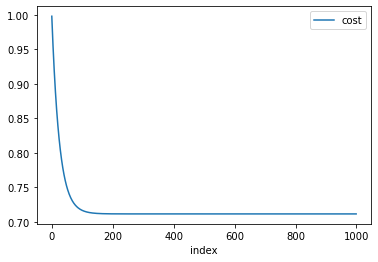

In [42]:
gradients.reset_index().plot.line(x='index', y=['cost'])

### multiple variable gradient descnt

In [62]:
import warnings
warnings.filterwarnings('ignore')

In [94]:
X=housing[['area', 'bedrooms',"bathrooms",'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]
y=housing["price"]

In [95]:
X['intercept'] = 1
X.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,intercept
0,1.045766,1.402131,1.420507,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.803284,1
1,1.755397,1.402131,5.400847,0.405251,-0.464888,-0.733865,-0.219063,1.471267,-0.553526,1
2,2.216196,0.047235,1.420507,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.803284,1
3,1.082630,1.402131,1.420507,0.405251,-0.464888,1.360148,-0.219063,1.471267,1.803284,1
4,1.045766,1.402131,-0.569663,0.405251,2.147110,1.360148,-0.219063,1.471267,-0.553526,1


In [96]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [97]:
theta = np.matrix(np.array([0,0,0])) 
alpha = 0.01
iterations = 1000

In [98]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

In [99]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [100]:
gradient_descent_multi(X, y, theta, alpha, iterations)

,Bets,cost
0,"[0.005350138644096795, 0.003658215596715304, 0...",0.487239
1,"[0.010600669165659472, 0.007238745138211377, 0...",0.475856
2,"[0.01575352114214854, 0.010743145958724633, 0....",0.464914
3,"[0.0208105859492842, 0.01417294443670284, 0.02...",0.454397
4,"[0.025773717526488805, 0.017529636612361427, 0...",0.444288
...,...,...
995,"[0.3086181387052668, 0.12936988063561355, 0.32...",0.184667
996,"[0.30861837159311506, 0.1293686762588223, 0.32...",0.184667
997,"[0.30861860299250143, 0.12936747940806495, 0.3...",0.184667
998,"[0.3086188329132765, 0.12936629003610237, 0.32...",0.184667


<AxesSubplot:xlabel='index'>

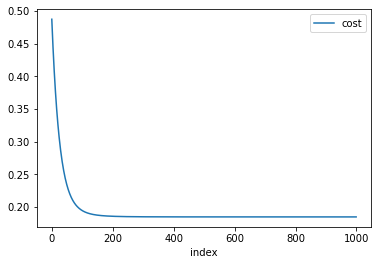

In [101]:
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])